In [15]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [16]:
from google.colab import drive     #Mounting google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
path1 = "/content/drive/My Drive/Datasets/PreprocessedDataforIdentification.csv"
df = pd.read_csv(path1)

In [18]:
#path = "/content/drive/My Drive/Datasets/CIC2019.csv"
#df = pd.read_csv(path)
df.head(10)

,Unnamed: 0,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,...,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound,Label
0,0,1.395596,0.157586,-0.607399,-2.031188,-0.725421,-0.954992,-0.935156,-0.945029,-0.050579,...,-0.101473,-0.933777,-0.945029,0.015085,-0.725421,-0.054584,-0.057299,-0.162793,0.197580,0.218899
1,1,0.347887,0.157586,-1.625958,-2.031188,-0.733744,-0.954992,-0.935156,-0.945029,-0.050579,...,-0.101473,-0.933085,-0.945029,0.015085,-0.733744,7.027636,-0.057299,-0.162793,0.197580,0.218899
2,2,1.196809,0.157586,-0.560525,-2.031188,-0.725421,-0.954992,-0.935156,-0.945029,-0.050579,...,-0.101473,-0.933777,-0.945029,0.015085,-0.725421,-0.054584,-0.057299,-0.162793,0.197580,0.218899
3,3,0.892029,0.157586,-1.562081,-2.031188,-0.725421,-0.954992,-0.935156,-0.945029,-0.050579,...,-0.101473,-0.933777,-0.945029,0.015085,-0.725421,-0.054584,-0.057299,-0.162793,0.197580,0.218899
4,4,-0.914218,0.157586,0.169285,0.489985,-0.424394,-0.494002,-0.472024,-0.480570,-0.085259,...,-0.101473,-0.467788,-0.480570,-0.095478,-0.424394,-0.362285,-0.057771,-0.162793,0.197580,0.218899
5,5,-0.914218,-0.665348,0.169285,0.489985,-0.424394,-0.494002,-0.472024,-0.480570,-0.085259,...,-0.101473,-0.467788,-0.480570,-0.095478,-0.424394,-0.362285,-0.057771,-0.162793,-5.061243,0.218899
6,6,0.335751,0.157586,-1.626009,-2.031188,1.223623,0.372164,-0.947617,-0.767119,5.556021,...,-0.101473,-0.777078,-0.767119,2.475530,1.223623,8.403734,0.059266,-0.162793,0.197580,0.218899
7,7,-0.940696,0.157586,-1.627133,-3.406373,-0.742067,-0.967396,-0.947617,-0.957525,-0.085259,...,-0.101473,-0.943471,-0.957525,-0.095478,-0.742067,-0.362285,-0.057771,3.949964,0.197580,0.218899
8,8,0.335751,0.157586,-1.626009,-2.031188,-0.706000,-0.859900,-0.839622,-0.849221,-0.085259,...,9.854818,-0.871461,-0.849221,-0.095478,-0.706000,-0.284234,0.059266,-0.162793,0.197580,0.218899
9,9,-0.939797,-0.665348,-0.032047,-2.031188,-0.742067,-0.967396,-0.947617,-0.957525,-0.050579,...,9.854818,-0.937932,-0.957525,0.015085,-0.742067,-0.287836,-0.057299,-0.162793,-5.061243,0.218899


In [19]:
print("This Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1])) #Starting data preprocessing 
#Data domensions

This Dataset has 1245798 rows and 36 columns


In [20]:
df.info()   #Data Summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245798 entries, 0 to 1245797
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Unnamed: 0                   1245798 non-null  int64  
 1    Source Port                 1245798 non-null  float64
 2    Destination IP              1245798 non-null  float64
 3    Destination Port            1245798 non-null  float64
 4    Protocol                    1245798 non-null  float64
 5   Total Length of Fwd Packets  1245798 non-null  float64
 6    Fwd Packet Length Max       1245798 non-null  float64
 7    Fwd Packet Length Min       1245798 non-null  float64
 8    Fwd Packet Length Mean      1245798 non-null  float64
 9   Bwd Packet Length Max        1245798 non-null  float64
 10   Bwd Packet Length Min       1245798 non-null  float64
 11   Bwd Packet Length Mean      1245798 non-null  float64
 12   Bwd Packet Length Std       1245798 non-n

In [21]:
df.describe()  #Descriptive statistics of dataset

,Unnamed: 0,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,...,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound,Label
count,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,...,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06
mean,6.228985e+05,1.054708e-12,1.373855e-13,-4.159763e-15,-1.240177e-11,1.063288e-13,-8.237663e-13,2.961019e-12,-1.186770e-12,8.682086e-13,...,-3.022469e-13,2.738720e-12,-1.186770e-12,-8.253327e-13,1.063288e-13,1.868235e-12,1.265789e-13,-1.166238e-12,-2.792804e-12,-2.841249e-14
std,3.596310e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000e+00,-9.406960e-01,-7.380619e+00,-1.627133e+00,-3.406373e+00,-7.420674e-01,-9.673956e-01,-9.476172e-01,-9.575252e-01,-8.525948e-02,...,-1.014731e-01,-9.434708e-01,-9.575252e-01,-9.547846e-02,-7.420674e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,-5.061243e+00,-4.568317e+00
25%,3.114492e+05,-9.092742e-01,1.575856e-01,-8.716894e-01,4.899846e-01,-4.243941e-01,-4.940017e-01,-4.720244e-01,-4.805696e-01,-8.525948e-02,...,-1.014731e-01,-4.677879e-01,-4.805696e-01,-9.547846e-02,-4.243941e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,1.975798e-01,2.188988e-01
50%,6.228985e+05,-5.546851e-01,1.575856e-01,1.857374e-03,4.899846e-01,-3.994241e-01,-4.567917e-01,-4.346415e-01,-4.430796e-01,-8.525948e-02,...,-1.014731e-01,-4.303980e-01,-4.430796e-01,-9.547846e-02,-3.994241e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,1.975798e-01,2.188988e-01
75%,9.343478e+05,1.002261e+00,1.575856e-01,8.720852e-01,4.899846e-01,2.275992e-01,3.313989e-02,3.264403e-02,2.554496e-02,-8.525948e-02,...,-1.014731e-01,3.697599e-02,2.554496e-02,-9.547846e-02,2.275992e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,1.975798e-01,2.188988e-01
max,1.245797e+06,1.737069e+00,2.688699e+00,1.719132e+00,4.899846e-01,1.438922e+02,6.526284e+00,3.478096e+00,3.480870e+00,2.087880e+01,...,9.854818e+00,2.114194e+00,3.480870e+00,3.400920e+01,1.438922e+02,1.931135e+01,3.087008e+01,5.903799e+01,1.975798e-01,2.188988e-01


In [22]:
df=df.drop('Unnamed: 0',axis=1)

In [23]:
print("This Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1])) #Starting data preprocessing 
#Data domensions

This Dataset has 1245798 rows and 35 columns


In [24]:
df.info()   #Data Summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245798 entries, 0 to 1245797
Data columns (total 35 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0    Source Port                 1245798 non-null  float64
 1    Destination IP              1245798 non-null  float64
 2    Destination Port            1245798 non-null  float64
 3    Protocol                    1245798 non-null  float64
 4   Total Length of Fwd Packets  1245798 non-null  float64
 5    Fwd Packet Length Max       1245798 non-null  float64
 6    Fwd Packet Length Min       1245798 non-null  float64
 7    Fwd Packet Length Mean      1245798 non-null  float64
 8   Bwd Packet Length Max        1245798 non-null  float64
 9    Bwd Packet Length Min       1245798 non-null  float64
 10   Bwd Packet Length Mean      1245798 non-null  float64
 11   Bwd Packet Length Std       1245798 non-null  float64
 12   Flow IAT Mean               1245798 non-n

In [25]:
df.describe()  #Descriptive statistics of dataset

,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,...,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound,Label
count,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,...,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06
mean,1.054708e-12,1.373855e-13,-4.159763e-15,-1.240177e-11,1.063288e-13,-8.237663e-13,2.961019e-12,-1.186770e-12,8.682086e-13,9.755238e-13,...,-3.022469e-13,2.738720e-12,-1.186770e-12,-8.253327e-13,1.063288e-13,1.868235e-12,1.265789e-13,-1.166238e-12,-2.792804e-12,-2.841249e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.406960e-01,-7.380619e+00,-1.627133e+00,-3.406373e+00,-7.420674e-01,-9.673956e-01,-9.476172e-01,-9.575252e-01,-8.525948e-02,-1.383783e-01,...,-1.014731e-01,-9.434708e-01,-9.575252e-01,-9.547846e-02,-7.420674e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,-5.061243e+00,-4.568317e+00
25%,-9.092742e-01,1.575856e-01,-8.716894e-01,4.899846e-01,-4.243941e-01,-4.940017e-01,-4.720244e-01,-4.805696e-01,-8.525948e-02,-1.383783e-01,...,-1.014731e-01,-4.677879e-01,-4.805696e-01,-9.547846e-02,-4.243941e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,1.975798e-01,2.188988e-01
50%,-5.546851e-01,1.575856e-01,1.857374e-03,4.899846e-01,-3.994241e-01,-4.567917e-01,-4.346415e-01,-4.430796e-01,-8.525948e-02,-1.383783e-01,...,-1.014731e-01,-4.303980e-01,-4.430796e-01,-9.547846e-02,-3.994241e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,1.975798e-01,2.188988e-01
75%,1.002261e+00,1.575856e-01,8.720852e-01,4.899846e-01,2.275992e-01,3.313989e-02,3.264403e-02,2.554496e-02,-8.525948e-02,-1.383783e-01,...,-1.014731e-01,3.697599e-02,2.554496e-02,-9.547846e-02,2.275992e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,1.975798e-01,2.188988e-01
max,1.737069e+00,2.688699e+00,1.719132e+00,4.899846e-01,1.438922e+02,6.526284e+00,3.478096e+00,3.480870e+00,2.087880e+01,1.169603e+02,...,9.854818e+00,2.114194e+00,3.480870e+00,3.400920e+01,1.438922e+02,1.931135e+01,3.087008e+01,5.903799e+01,1.975798e-01,2.188988e-01


In [26]:
#Separating input and output attributes
x = df.drop(['Label'], axis=1)
y = df['Label']

In [27]:

y.describe()

count    1.245798e+06
mean    -2.841249e-14
std      1.000000e+00
min     -4.568317e+00
25%      2.188988e-01
50%      2.188988e-01
75%      2.188988e-01
max      2.188988e-01
Name: Label, dtype: float64

In [28]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245798 entries, 0 to 1245797
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0    Source Port                 1245798 non-null  float64
 1    Destination IP              1245798 non-null  float64
 2    Destination Port            1245798 non-null  float64
 3    Protocol                    1245798 non-null  float64
 4   Total Length of Fwd Packets  1245798 non-null  float64
 5    Fwd Packet Length Max       1245798 non-null  float64
 6    Fwd Packet Length Min       1245798 non-null  float64
 7    Fwd Packet Length Mean      1245798 non-null  float64
 8   Bwd Packet Length Max        1245798 non-null  float64
 9    Bwd Packet Length Min       1245798 non-null  float64
 10   Bwd Packet Length Mean      1245798 non-null  float64
 11   Bwd Packet Length Std       1245798 non-null  float64
 12   Flow IAT Mean               1245798 non-n

In [29]:
y.nunique()

2

In [30]:
y = pd.get_dummies(y,prefix=['Label'])
y.head()

,['Label']_-4.568316667297572,['Label']_0.2188988352044452
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [31]:
#Fitting unique values from each column of features
print(df.apply(lambda col: col.unique()))

 Source Port                   [1.3955958101410246, 0.3478867838335298, 1.196...
 Destination IP                [0.15758556942075, -0.6653475895920182, 0.1575...
 Destination Port              [-0.6073991496353963, -1.625958413952753, -0.5...
 Protocol                      [-2.0311882463058, 0.4899845510661981, -3.4063...
Total Length of Fwd Packets    [-0.7254207907132191, -0.7337441094492392, -0....
 Fwd Packet Length Max         [-0.9549922605226312, -0.4940017361603299, 0.3...
 Fwd Packet Length Min         [-0.9351562527047764, -0.4720243594698703, -0....
 Fwd Packet Length Mean        [-0.9450285741767762, -0.4805695650824725, -0....
Bwd Packet Length Max          [-0.0505794780308098, -0.0852594833649303, 5.5...
 Bwd Packet Length Min         [0.3428492031899198, -0.1383783026563304, 10.1...
 Bwd Packet Length Mean        [0.0150853223570329, -0.0954784579924567, 2.47...
 Bwd Packet Length Std         [-0.0768714136339322, 5.686272903449474, 4.894...
 Flow IAT Mean              

In [32]:
#Normalizing the input features entering the neural network
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
x = ms.fit_transform(x)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(X_train.shape, X_test.shape)
#y_train = np.array(y_train)
#print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(934348, 34) (311450, 34)


In [34]:
print('xtrain={}, ytrain={}, xtest={}, ytest={}'.format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

xtrain=(934348, 34), ytrain=(934348, 2), xtest=(311450, 34), ytest=(311450, 2)


In [46]:
###Defining my deep neural network model###
model = keras.Sequential()
model.add(Dense(17 , input_shape=(34,) , activation="relu" , name="Hidden_Layer_1"))
model.add(Dense(17 , activation="relu" , name="Hidden_Layer_2"))
model.add(Dense(17 , activation="relu" , name="Hidden_Layer_3"))
model.add(Dense(2 , activation="sigmoid" , name="Output_Layer"))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile( optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 17)                595       
                                                                 
 Hidden_Layer_2 (Dense)      (None, 17)                306       
                                                                 
 Hidden_Layer_3 (Dense)      (None, 17)                306       
                                                                 
 Output_Layer (Dense)        (None, 2)                 36        
                                                                 
Total params: 1,243
Trainable params: 1,243
Non-trainable params: 0
_________________________________________________________________


In [47]:
# fit model
history_org = model.fit(
    X_train, 
    y_train, 
    batch_size=2000, 
    epochs=100, verbose=2, 
    callbacks=None, 
    validation_data=(X_test,y_test), 
    shuffle=True, 
    class_weight=None, 
    sample_weight=None, 
    initial_epoch=0)

Epoch 1/100
468/468 - 3s - loss: 0.0105 - accuracy: 0.9975 - val_loss: 0.0026 - val_accuracy: 0.9992 - 3s/epoch - 5ms/step
Epoch 2/100
468/468 - 2s - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0010 - val_accuracy: 0.9997 - 2s/epoch - 4ms/step
Epoch 3/100
468/468 - 2s - loss: 7.5943e-04 - accuracy: 0.9998 - val_loss: 9.2976e-04 - val_accuracy: 0.9998 - 2s/epoch - 4ms/step
Epoch 4/100
468/468 - 2s - loss: 6.9359e-04 - accuracy: 0.9998 - val_loss: 6.9748e-04 - val_accuracy: 0.9998 - 2s/epoch - 4ms/step
Epoch 5/100
468/468 - 2s - loss: 7.1202e-04 - accuracy: 0.9998 - val_loss: 5.8680e-04 - val_accuracy: 0.9998 - 2s/epoch - 4ms/step
Epoch 6/100
468/468 - 2s - loss: 5.6080e-04 - accuracy: 0.9999 - val_loss: 7.6746e-04 - val_accuracy: 0.9998 - 2s/epoch - 4ms/step
Epoch 7/100
468/468 - 2s - loss: 5.1898e-04 - accuracy: 0.9999 - val_loss: 4.0718e-04 - val_accuracy: 0.9999 - 2s/epoch - 4ms/step
Epoch 8/100
468/468 - 2s - loss: 5.0211e-04 - accuracy: 0.9999 - val_loss: 5.9723e-04 - val_accurac

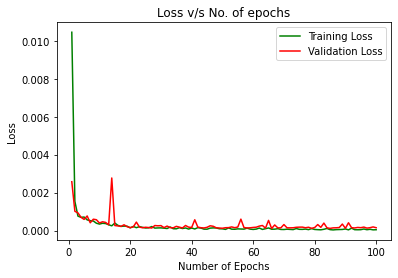

In [50]:
#Plotting Loss v/s Epochs
loss = history_org.history['loss']
val_loss = history_org.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss v/s No. of epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

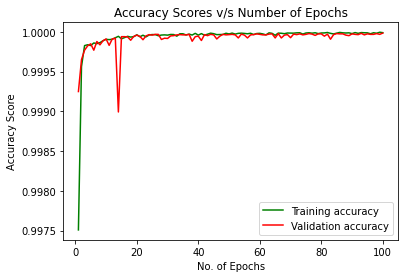

In [51]:
#Plotting Accuracy v/s Epochs
loss = history_org.history['accuracy']
val_loss = history_org.history['val_accuracy']
plt.plot(epochs, loss, 'g', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'r', label = 'Validation accuracy')
plt.title('Accuracy Scores v/s Number of Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [52]:
Classifier_accuracy=[]
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy of Deep neural Network : %.2f'%  (accuracy*100))
Classifier_accuracy.append(accuracy*100)

9733/9733 [==============================] - 14s 1ms/step - loss: 1.4784e-04 - accuracy: 1.0000
Accuracy of Deep neural Network : 100.00


In [53]:
y_train = np.array(y_train)
y_test = np.array(y_test)
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [54]:
y_pred = model.predict(X_test)
print(y_pred)

[[1.3827005e-17 1.0000000e+00]
 [2.4359549e-15 1.0000000e+00]
 [4.6061897e-15 1.0000000e+00]
 ...
 [8.0923484e-16 1.0000000e+00]
 [8.3729207e-17 1.0000000e+00]
 [6.1910147e-19 1.0000000e+00]]


In [55]:
a =(y_pred > 0.5)
b = (y_test > 0.5) 
b=np.argmax(y_test, axis=1)
a=np.argmax(y_pred, axis=1)


In [56]:
#Previously known testing array
b[:110]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [44]:
#Prediction array
a[:110]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [57]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print('Deep Neural Network')

print('Accuracy: %f' % (accuracy_score(a, b)*100))
print("Confusion Matrix =\n", metrics.confusion_matrix(b, a, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(b, a, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(b, a, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                output_dict=False))

print("F1 Score = ",f1_score(a, b, average='macro'))

Deep Neural Network
Accuracy: 99.998395
Confusion Matrix =
 [[ 14318      3]
 [     2 297127]]
Recall = 0.9999839460587574
Classification Report =
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14321
           1       1.00      1.00      1.00    297129

    accuracy                           1.00    311450
   macro avg       1.00      1.00      1.00    311450
weighted avg       1.00      1.00      1.00    311450

F1 Score =  0.9999085056250747
